# Sección 6: Regresión Polinómica
En la lineal polinómica se tiene una misma variable, pero cada vez tiene una potencia diferente
Hay diferencias en este modelo, por ejemplo
En la lineal múltiple hay varias variables mientras que en la polinómica solo se tiene una variable elevada a las potencias sucesivas de la misma
Cuando usaremos una regresión polinómica
Tenemos una observación de un conjunto de datos si calculamos la recta que mejor se ajusta a esos datos, la regresión lineal simple en este caso aparecería de esta manera   

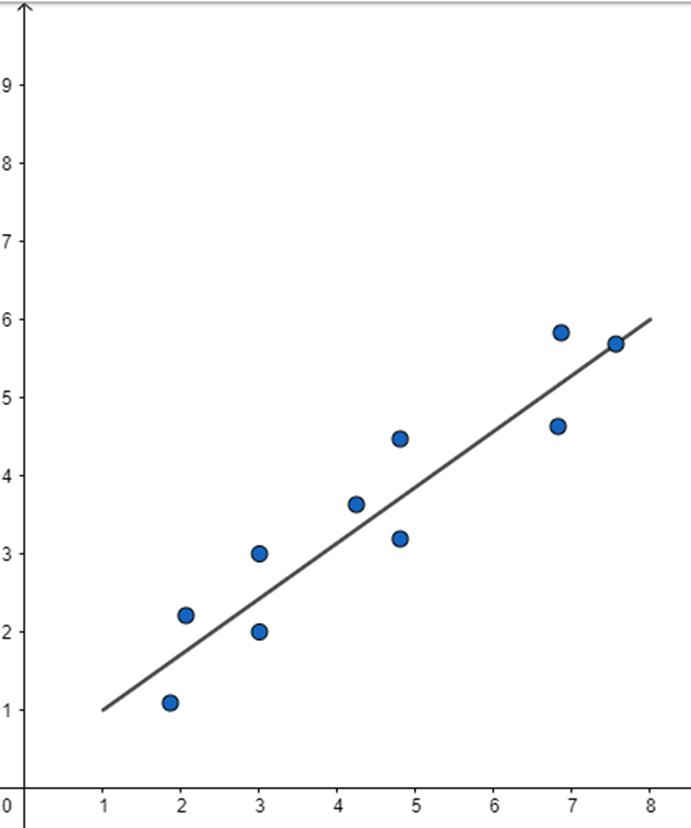

Pero el conjunto de datos no fuera parejo y pareciera de esta manera 

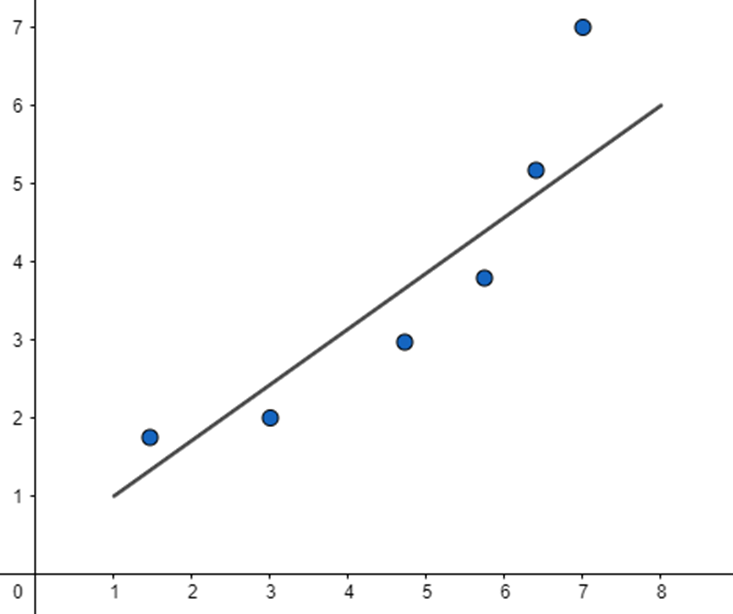

Vemos que usando la RLS se ajusta a los datos pero los puntos hacen una especie de “curva” por lo tanto el modelo está dejando parte de la información de que si hemos elegido el mejor modelo lineal pero que si no fuese lineal podríamos corregir ese sesgo 
Por lo tanto, aplicamos el resultado usando la regresión polinómica

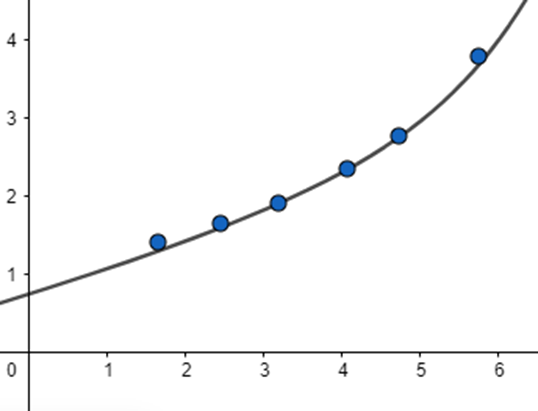

Como seria esa fórmula, pues lo que tenemos es una parábola y es una ecuación de segundo grado

$y=b_0+b_1+x_z+b_zx_1^{2}$



De modo que en este caso el resultado de una regresión polinómica es de grado 2

Entonces a aparecido ese coeficiente cuadrado que permite curvar y dar ese efecto parabólico

La curva de hecho se vuelve una parábola y ya no es una recta como ocurría en casos anteriores

Al mismo tiempo evidentemente tendrá unos casos de uso dependiendo de que estamos analizando en cada momento y su contexto, a veces tendremos que usar una regresión lineal simple, otras usaremos la polinómica y elegir hasta que grado se desea. Uno puede añadir variables e ir jugando con los exponentes.

Por ejemplo, este tipo de modelos se suele usar para describir como se transmiten las enfermedades como pandemias y epidemias de un territorio o entre poblaciones 

No es una regla totalmente lineal, sino que la regresión polinomial es muy útil y evidentemente existen otros casos de usos, la cuestión es saber que usar


Y la pregunta ¿Por qué es lineal?, vimos potencias de la variable enésimas, pero porque se llama, si volvemos a la formula general

$y=b_0+(b_1 \cdot x_1)^{1}+(b_2 \cdot x_2)^{2}+\cdots (b_n \cdot x_n)^{n}$

y miramos a la izquierda se notará como regresión lineal polinómica, pero se llama lineal debido a los coeficientes, no es la relación entre $x$ e $y$ sino que los coeficientes tienen una relación lineal con las variables

Se llama regresión lineal polinómica porque la $y$ se predice como combinación lineal de esos factores 


Para concluir el objetivo de la regresión lineal polinómica es encontrar esos coeficientes para que su combinación lineal con una base con usa serie de columnas y variables nos den la predicción Y la palabra lineal o no lineal no se refiere a las $x$ en cambio esto se refiere a los coeficientes 

## Comenzamos a codificar

In [3]:
#importamos libreria
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
#importamos data set
ds=pd.read_csv("Position_Salaries.csv")

Imagina que estamos en el departamento de recursos humanos de una gran empresa y estamos a punto de contratar a un nuevo empleado para la empresa este nuevo empleado parece ser un buen fichaje, y queremos hacerle una oferta acorde de su capacidad, negociar cuando será su salario futuro, así que en el comienzo de la negociación dice que lleva una serie de años en el sector, dice tener 20 años de experiencia y ha ganado $160,000 de sueldo anual en la compañía que está actualmente, sin embargo hay alguien de recursos humanos que es un fan del machine learning así que decide llamar a esa empresa para verificar dicha info. Pero lamentablemente toda la información que el empleado de RH logra obtener es la siguiente tabla



In [4]:
ds

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Usando su software de hoja de cálculos y haciendo una grafica de nube de puntos se da cuenta de esto 

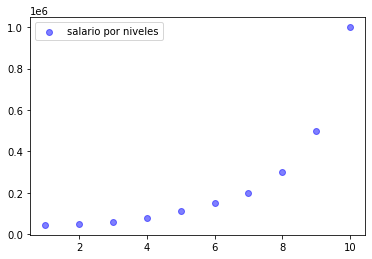

In [5]:
x = ds.Level
y = ds.Salary
# Graficamos x e y como nube de puntos
plt.scatter(x,y, color='blue', alpha=0.5, label = 'salario por niveles') 
plt.legend()
plt.show()


Observa que no es lineal si no tiene una tendencia de “panza” por lo tanto no existe una regresión lineal, sin embargo, ese empleado podría dedicarse a sacar mas info. Así que podría investigar si ese empleado viene de alguno de esos cargos, pero viendo el sueldo que ha dicho parece que está en la mitad de los cargos Region Manager y Partner, entonces cual es el sueldo para ofrecer, para no dar menos o más de ello a tal punto de que ejerzan presión en el empleado 

Entonces para detectar que trabajo estaba harán un “detector de chismosos” usando regresión lineal polinómica 

Viendo el data set, averiguamos que no hay necesidad de usar `Position` ya que contamos con `Level` para ello así que usaremos solamente `Level` como **variable dependiente** y `Salary` como **variable independiente** para nuestro modelo 

In [6]:
X=ds.iloc[:,1].values 
#definimos que queremos todas las columnas y queremos la fila 1 y solo los valores
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [7]:
y = ds.iloc[:,2].values #nuestra variable independiente es Salary y solo los valores
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Viendo los datos que pasamos a sus respectivas variables notamos que el tamaño es (10,) , cuando construimos un modelo de aprendizaje automático y especialmente en el modelo de regresión hay que recordar que la matriz de características se llama matriz precisamente porque debe de ser considerada matriz, en este caso cuando tenemos tamaño o una de las dos dimensiones solo 10 esto no es una matriz, es un vector, por lo tanto para especificar que la matriz sea una matriz y no un vector, hay que modificar ello, indicando que cuando obtenemos los datos del data set a las variables en lugar por ejemplo de las dependientes usamos esto 

In [8]:
X=ds.iloc[:,1:2].values 
#indicamos que es de la 1 a la 2, solo incluye la primera y no la ultima, solo la 1 haciendo que ahora si tenga dimension volviendose matriz
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

Como en este caso solo tenemos un conjunto de 10 observaciones no es necesario dividir en conjunto de prueba y testing, porque no tendríamos la suficiente info para entrenar nuestro modelo con un conjunto de datos tan pequeño y probar el rendimiento con otro conjunto lo cual  sería ridículo debido a que si se queda en el conjunto de testing el nivel 10, no tendíamos suficiente info.

Tampoco haremos escalado debido a que este modelo busca entender las relaciones no lineales, por lo tanto como usaremos la misma librería, y en caso de que nos hace falta hay que recordar que hay un parámetro que automáticamente nos normaliza los datos

Ajustaremos la regresion lineal con el data set solo como ejemplo para denotar cuando intentamos ajustar datos que nos son lineales

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Ajustar la regrecion polinomica con el dataset

transformaremos X en una X polinomica lo cual añadiremos la potencias de x a la 1,2,3 o lo que nesecitemos

en `PolynomialFeatures` tendermos los sig. parametros `degree=x` donde `x` es la potencia polinomica del grado, por defecto `degree=2`

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poli= poly_reg.fit_transform(X) #de nuestra matriz de origen, transformaremos a la potencia dada
X_poli

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [11]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poli,y)

LinearRegression()

### visualizacion de los resultados de l modelo lineal

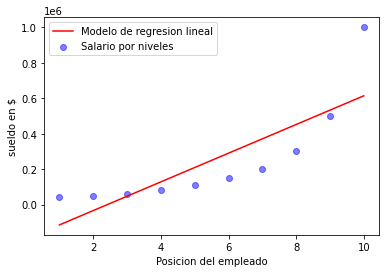

In [12]:
# Graficamos x y como nube de puntos
plt.scatter(X,y, color='blue', alpha=0.5, label = 'Salario por niveles') 
plt.plot(X, lin_reg.predict(X), color="red", label = "Modelo de regresion lineal") 
plt.legend()
plt.xlabel("Posicion del empleado")
plt.ylabel("sueldo en $")
plt.show()

### visulizacion de los resultados del modelo polinomico

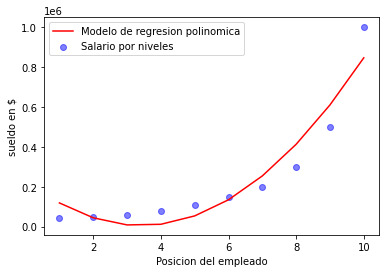

In [13]:
plt.scatter(X,y, color='blue', alpha=0.5, label = 'Salario por niveles') 
plt.plot(X, lin_reg_2.predict(X_poli), color="red", label = "Modelo de regresion polinomica") 
plt.legend()
plt.xlabel("Posicion del empleado")
plt.ylabel("sueldo en $")
plt.show()

Diferencias de las dos regresiones

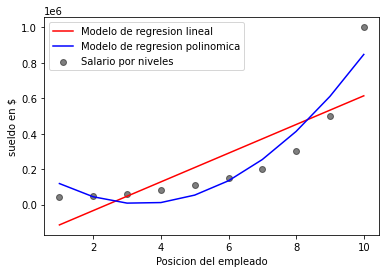

In [14]:
plt.scatter(X,y, color='black', alpha=0.5, label = 'Salario por niveles') 
plt.plot(X, lin_reg.predict(X), color="red", label = "Modelo de regresion lineal")
plt.plot(X, lin_reg_2.predict(X_poli), color="blue", label = "Modelo de regresion polinomica")  
plt.legend()
plt.xlabel("Posicion del empleado")
plt.ylabel("sueldo en $")
plt.show()

pero que pasaria si fuese de grado 3 nuestra prediccion

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poli= poly_reg.fit_transform(X) #de nuestra matriz de origen, transformaremos a la potencia dada
X_poli

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [16]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poli,y)

LinearRegression()

### visulizacion de los resultados del modelo polinomico grado 3

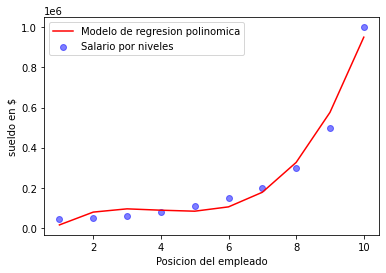

In [17]:
plt.scatter(X,y, color='blue', alpha=0.5, label = 'Salario por niveles') 
plt.plot(X, lin_reg_3.predict(X_poli), color="red", label = "Modelo de regresion polinomica") 
plt.legend()
plt.xlabel("Posicion del empleado")
plt.ylabel("sueldo en $")
plt.show()

y que pasaria con 4

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poli= poly_reg.fit_transform(X) #de nuestra matriz de origen, transformaremos a la potencia dada
X_poli

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [19]:
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poli,y)

LinearRegression()

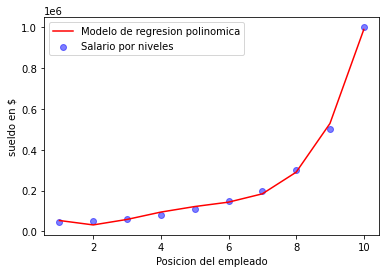

In [20]:
X_grid = np.arange(min(X), max(X), 0.1)
plt.scatter(X,y, color='blue', alpha=0.5, label = 'Salario por niveles') 
plt.plot(X, lin_reg_4.predict(X_poli), color="red", label = "Modelo de regresion polinomica") 
plt.legend()
plt.xlabel("Posicion del empleado")
plt.ylabel("sueldo en $")
plt.show()

Prediccion de nuestros modelos

In [21]:
lin_reg.predict([[6.5]]) #cantidad que deberia ganar con regresion lineal

array([330378.78787879])

In [22]:
lin_reg_4.predict(poly_reg.fit_transform([[6.5]]))#cantidad que deberia ganar con regresion polinomica

array([158862.45265157])